## *Ride Price Prediction using Machine Learning*

This project predicts ride prices using Machine Learning based on features such as distance, duration, traffic, weather, and demand level.
Linear Regression is used to estimate the ride cost, while Logistic Regression classifies rides as high-cost or low-cost.
The workflow includes data preprocessing, encoding, scaling, model training, and performance evaluation.

##  Dataset Justification

### Features Used

1. distance_km (Numerical)
   - Longer distances increase fuel cost and driver time.

2. duration_min (Numerical)
   - Longer trips increase operational cost.

3. time_of_day (Categorical)
   - Surge pricing often applies during peak hours.

4. traffic_level (Categorical)
   - Heavy traffic increases trip duration and cost.

5. weather (Categorical)
   - Bad weather increases demand and price.

6. demand_level (Categorical)
   - High demand leads to surge pricing.

7. vehicle_type (Categorical)
   - Premium vehicles cost more than standard rides.

### Excluded Feature
I considered including driver_rating but excluded it because driver rating does not directly affect ride pricing in most ride-hailing systems.

## 1. Problem Framing

### ML Mindset & Problem Type
This is a supervised machine learning regression problem because the target variable is continuous.

### Why Machine Learning?
Ride pricing depends on multiple interacting factors such as distance, demand, weather, and vehicle type. 
Creating fixed rules would be complex and inflexible. Machine learning allows the model to learn pricing patterns directly from data.

### What Should the Model Learn?
The model should learn:
- How distance and duration affect price
- How demand and weather introduce surge pricing



### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pltS

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix

### Set random seed and number of rides

In [2]:
np.random.seed(42)
n = 200


### Create features one by one

In [3]:
data = {
    "distance_km": np.random.uniform(1, 30, n),
    "duration_min": np.random.uniform(5, 90, n),
    "time_of_day": np.random.choice(
        ["morning", "afternoon", "evening", "night"], n
    ),
    "traffic_level": np.random.choice(
        ["low", "medium", "high"], n
    ),
    "weather": np.random.choice(
        ["clear", "rainy"], n
    ),
    "demand_level": np.random.choice(
        ["low", "medium", "high"], n
    ),
    "ride_type": np.random.choice(
        ["standard", "premium"], n
    )
}


### Create the DataFrame

In [4]:
df = pd.DataFrame(data)
df.head()



,distance_km,duration_min,time_of_day,traffic_level,weather,demand_level,ride_type
0,11.861663,59.572690,morning,medium,clear,high,standard
1,28.570715,12.151897,afternoon,high,rainy,low,standard
2,22.227824,18.738441,morning,low,rainy,medium,premium
3,18.361096,81.377106,morning,low,rainy,low,standard
4,5.524541,56.546470,afternoon,low,rainy,high,premium


### Create the price (target)

In [5]:
df["ride_price"] = (
    2 +
    df["distance_km"] * 0.8 +
    df["duration_min"] * 0.2 +
    df["traffic_level"].map({"low": 0, "medium": 2, "high": 5}) +
    df["weather"].map({"clear": 0, "rainy": 3}) +
    df["demand_level"].map({"low": 0, "medium": 2, "high": 6}) +
    df["ride_type"].map({"standard": 0, "premium": 5})
)


In [6]:
df.head()



,distance_km,duration_min,time_of_day,traffic_level,weather,demand_level,ride_type,ride_price
0,11.861663,59.572690,morning,medium,clear,high,standard,31.403869
1,28.570715,12.151897,afternoon,high,rainy,low,standard,35.286951
2,22.227824,18.738441,morning,low,rainy,medium,premium,33.529948
3,18.361096,81.377106,morning,low,rainy,low,standard,35.964298
4,5.524541,56.546470,afternoon,low,rainy,high,premium,31.728926


### Check for missing values

In [7]:
print(df.isnull().sum())



distance_km      0
duration_min     0
time_of_day      0
traffic_level    0
weather          0
demand_level     0
ride_type        0
ride_price       0
dtype: int64


Poor data quality can cause biased predictions and unstable models.

### Simple visualization

<Axes: xlabel='distance_km', ylabel='ride_price'>

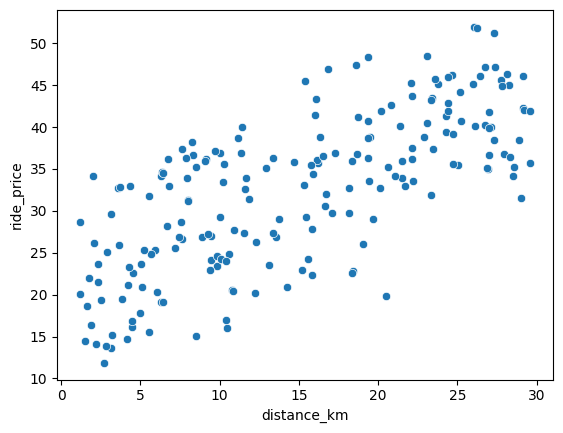

In [9]:
sns.scatterplot(x="distance_km", y="ride_price", data=df)




### Encoding categorical data

In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)



### Regression task

In [13]:
X = df_encoded.drop("ride_price", axis=1)
y = df_encoded["ride_price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 9.681144774731365e-15


### Classification task

In [14]:
df_encoded["high_cost"] = (
    df_encoded["ride_price"] > df_encoded["ride_price"].median()
).astype(int)

X_cls = df_encoded.drop(["ride_price", "high_cost"], axis=1)
y_cls = df_encoded["high_cost"]

X_cls_scaled = scaler.fit_transform(X_cls)

X_train, X_test, y_train, y_test = train_test_split(
    X_cls_scaled, y_cls, test_size=0.2, random_state=42
)

clf = LogisticRegression()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))


Accuracy: 0.95
[[17  2]
 [ 0 21]]


Logistic regression outputs probabilities between 0 and 1. 
If the probability exceeds 0.5, the ride is classified as high-cost.


## 7. Ethical & Practical Reflection

Unfair Pricing Risk:
The model may charge higher prices in areas with historically high demand, potentially leading to unfair pricing patterns.

Real-World Risk:
Incorrect predictions could overcharge customers or reduce driver earnings.

Dataset Limitation:
The dataset is synthetic and may not capture real-world complexities such as geographic differences.
